# **Sabancı University CS412 Project - Spring 2023**

---

#### ***kNN Model***

Can Ceylan, *29010*

Barış Ulaş Çukur, *29461*

Alper Kaan Odabaşoğlu, *28147*

Safa Abdullah Söğütlügil, *29214* 
   
Pelinsu Saraç, *28820*

In [ ]:
#Importing libaries and setting seed for reproducability
import random
import numpy as np

random.seed(42)
np.random.seed(42)

In [ ]:
#Loading the data from Google Drive.
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Function to unpack the "pickled" dataset.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
!tar -xzvf "/content/drive/My Drive/CS412-Project/cifar-10-python.tar.gz" -C "drive/My Drive/CS412-Project"

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
#Unpickling the data and loading them to variables.
xdata_batch_1 = unpickle('/content/drive/My Drive/CS412-Project/cifar-10-batches-py/data_batch_1')
xdata_batch_2 = unpickle('/content/drive/My Drive/CS412-Project/cifar-10-batches-py/data_batch_2')
xdata_batch_3 = unpickle('/content/drive/My Drive/CS412-Project/cifar-10-batches-py/data_batch_3')
xdata_batch_4 = unpickle('/content/drive/My Drive/CS412-Project/cifar-10-batches-py/data_batch_4')
xdata_batch_5 = unpickle('/content/drive/My Drive/CS412-Project/cifar-10-batches-py/data_batch_5')
xtest_batch = unpickle('/content/drive/My Drive/CS412-Project/cifar-10-batches-py/test_batch')

data_batch_1 = { "labels" : xdata_batch_1[b"labels"], "data" : xdata_batch_1[b"data"]}
data_batch_2 = { "labels" : xdata_batch_2[b"labels"], "data" : xdata_batch_2[b"data"]}
data_batch_3 = { "labels" : xdata_batch_3[b"labels"], "data" : xdata_batch_3[b"data"]}
data_batch_4 = { "labels" : xdata_batch_4[b"labels"], "data" : xdata_batch_4[b"data"]}
data_batch_5 = { "labels" : xdata_batch_5[b"labels"], "data" : xdata_batch_5[b"data"]}
test_batch = { "labels" : xtest_batch[b"labels"], "data" : xtest_batch[b"data"]}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#Different k values to be tried.
k_values = [1, 3, 5, 7, 9, 11]

#Validation accuracies to be stored in this list.
val_accs = [0,0,0,0,0,0] 
for i in range(1,6): # (1,2,3,4,5)
  # Construct the x_train and y_train, and also the x_test and y_test according to the value of i.
  combined_dict = {}
  validation_dict = {}
  if i == 1:
    combined_dict.update(data_batch_2)
    combined_dict.update(data_batch_3)
    combined_dict.update(data_batch_4)
    combined_dict.update(data_batch_5)
    validation_dict = data_batch_1
  elif i == 2:
    combined_dict.update(data_batch_1)
    combined_dict.update(data_batch_3)
    combined_dict.update(data_batch_4)
    combined_dict.update(data_batch_5)
    validation_dict = data_batch_2
  elif i == 3:
    combined_dict.update(data_batch_1)
    combined_dict.update(data_batch_2)
    combined_dict.update(data_batch_4)
    combined_dict.update(data_batch_5)
    validation_dict = data_batch_3
  elif i == 4:
    combined_dict.update(data_batch_1)
    combined_dict.update(data_batch_2)
    combined_dict.update(data_batch_3)
    combined_dict.update(data_batch_5)
    validation_dict = data_batch_4
  else: #i==5
    combined_dict.update(data_batch_1)
    combined_dict.update(data_batch_2)
    combined_dict.update(data_batch_3)
    combined_dict.update(data_batch_4)
    validation_dict = data_batch_5
  
  X_train = combined_dict["data"]
  Y_train = combined_dict["labels"]
  x_test = validation_dict["data"]
  y_test = validation_dict["labels"]

  #Creating models with n_neighbors=k and calculating validation accuracy over 5 folds.
  for k in k_values:
      model = KNeighborsClassifier(n_neighbors=k)
      model.fit(X_train, Y_train)
      y_pred = model.predict(x_test)
      acc = accuracy_score(y_true = y_test, y_pred = y_pred)
      val_accs[int((k-1)/2)] += acc
      print('Validation accuracy for k=', k, ' for the ',i,'th fold:', acc)

#Best k parameter is found and printed. The vallidation accuracies are averaged.
max = -1
best_k = 0
for j in range(6):
  val_accs[j] /=5
  if max < val_accs[j]:
    max = val_accs[j]
    best_k = 2*j+1

print('Best averaged validation accuracy (', max, ') is achieved with k=', best_k)

Validation accuracy for k= 1  for the  1 th fold: 0.2953
Validation accuracy for k= 3  for the  1 th fold: 0.2893
Validation accuracy for k= 5  for the  1 th fold: 0.2968
Validation accuracy for k= 7  for the  1 th fold: 0.2978
Validation accuracy for k= 9  for the  1 th fold: 0.2972
Validation accuracy for k= 11  for the  1 th fold: 0.2968
Validation accuracy for k= 1  for the  2 th fold: 0.2864
Validation accuracy for k= 3  for the  2 th fold: 0.2765
Validation accuracy for k= 5  for the  2 th fold: 0.287
Validation accuracy for k= 7  for the  2 th fold: 0.2858
Validation accuracy for k= 9  for the  2 th fold: 0.2892
Validation accuracy for k= 11  for the  2 th fold: 0.2879
Validation accuracy for k= 1  for the  3 th fold: 0.2982
Validation accuracy for k= 3  for the  3 th fold: 0.2812
Validation accuracy for k= 5  for the  3 th fold: 0.293
Validation accuracy for k= 7  for the  3 th fold: 0.2969
Validation accuracy for k= 9  for the  3 th fold: 0.2902
Validation accuracy for k= 11  

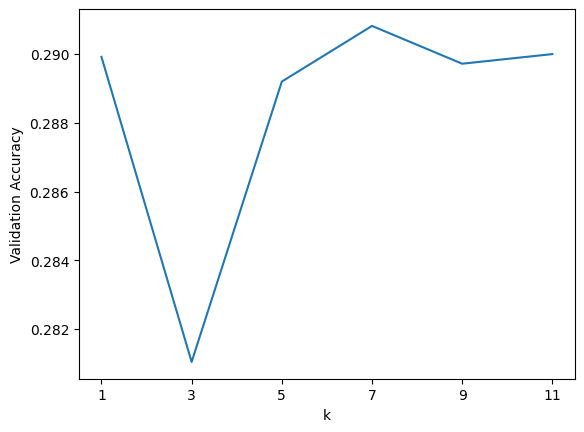

In [ ]:
#Plotting Validation Accuracy with respect to k value.
import matplotlib.pyplot as plt

plt.plot(k_values, val_accs)
plt.xticks(k_values)
plt.xlabel('Value of K')
plt.ylabel('Mean Validation Accuracy Over 5-folds')
plt.show()

In [ ]:
#Combine all the folds to get test set, use test_batch to get overall model accuracy
#since we used 5'th fold at last iteration, combined_dict already stores data1,data2,data3,data4
combined_dict.update(data_batch_5)

X_train = combined_dict["data"]
Y_train = combined_dict["labels"]

x_test = test_batch["data"]
y_test = test_batch["labels"]

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, Y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('Validation accuracy for k=', best_k, ' :', acc)

Validation accuracy for k= 7  : 0.2962
